# Лабораторная работа №5 "Распознавание объектов на фотографиях"
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна

### Цель работы:
Распознавание объектов на фотографиях (Object Recognition in Photographs)
CIFAR-10 (классификация небольших изображений по десяти классам: самолет,
автомобиль, птица, кошка, олень, собака, лягушка, лошадь, корабль и грузовик).

### Задачи:
- Ознакомиться со сверточными нейронными сетями
- Изучить построение модели в Keras в функциональном виде
- Изучить работу слоя разреживания (Dropout)


### Выполнение работы

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from PIL import Image

Определение параметров модели

In [2]:
batch_size = 32
num_epochs = 15
kernel_size = 3
pool_size = 2
conv_depth_1 = 32
conv_depth_2 = 64
drop_prob_1 = 0.25
drop_prob_2 = 0.5
hidden_size = 512

Загрузка и предобработка данных

In [4]:
# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Предобработка данных
num_train, height, width, depth = X_train.shape
num_test = X_test.shape[0]
num_classes = np.unique(y_train).shape[0]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train)
X_test /= np.max(X_train)

Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

Модель с изначальными параметрами

In [5]:
# Создание модели
model = Sequential()

# Первый блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model.add(Input(shape=(height, width, depth)))
model.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(drop_prob_1))

# Второй блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(drop_prob_1))

# Преобразование в 1D и полносвязный слой с ReLU и dropout
model.add(Flatten())
model.add(Dense(hidden_size, activation='relu'))
model.add(Dropout(drop_prob_2))

# Выходной слой с softmax
model.add(Dense(num_classes, activation='softmax'))

In [6]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)

# Оценка модели на тестовых данных
model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.3323 - loss: 1.8108 - val_accuracy: 0.6056 - val_loss: 1.1197
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.5790 - loss: 1.1722 - val_accuracy: 0.6694 - val_loss: 0.9528
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.6518 - loss: 0.9930 - val_accuracy: 0.7062 - val_loss: 0.8361
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.6817 - loss: 0.8918 - val_accuracy: 0.7376 - val_loss: 0.7587
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.7198 - loss: 0.8029 - val_accuracy: 0.7576 - val_loss: 0.7091
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.7398 - loss: 0.7469 - val_accuracy: 0.7430 - val_loss: 0.7470
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.7541 - loss: 0.6941 - val_accuracy: 0.7648 - val_loss: 0.6761
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.7714 -

[226.2728271484375, 0.5322999954223633]

Модель без слоя Dropout

In [33]:
# Создание модели
model1 = Sequential()

# Первый блок: Conv -> Conv -> Pool (без dropout на слое пулинга)
model1.add(Input(shape=(height, width, depth)))
model1.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model1.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# Второй блок: Conv -> Conv -> Pool (без dropout на слое пулинга)
model1.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model1.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# Преобразование в 1D и полносвязный слой с ReLU и dropout
model1.add(Flatten())
model1.add(Dense(hidden_size, activation='relu'))

# Выходной слой с softmax
model1.add(Dense(num_classes, activation='softmax'))

In [34]:
# Компиляция модели
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model1.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)

# Оценка модели на тестовых данных
model1.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.3829 - loss: 1.6718 - val_accuracy: 0.6358 - val_loss: 1.0480
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.6749 - loss: 0.9144 - val_accuracy: 0.7058 - val_loss: 0.8630
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.7695 - loss: 0.6613 - val_accuracy: 0.7454 - val_loss: 0.7596
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.8367 - loss: 0.4669 - val_accuracy: 0.7640 - val_loss: 0.7224
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.8968 - loss: 0.2989 - val_accuracy: 0.7534 - val_loss: 0.8318
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9361 - loss: 0.1847 - val_accuracy: 0.7538 - val_loss: 1.0065
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9546 - loss: 0.1301 - val_accuracy: 0.7472 - val_loss: 1.2017
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9681 -

[434.5845031738281, 0.6104000210762024]

Модель с размером ядра 5х5

In [35]:
kernel_size = 5

# Создание модели
model2 = Sequential()

# Первый блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model2.add(Input(shape=(height, width, depth)))
model2.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model2.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(drop_prob_1))

# Второй блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model2.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model2.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(drop_prob_1))

# Преобразование в 1D и полносвязный слой с ReLU и dropout
model2.add(Flatten())
model2.add(Dense(hidden_size, activation='relu'))
model2.add(Dropout(drop_prob_2))

# Выходной слой с softmax
model2.add(Dense(num_classes, activation='softmax'))

In [36]:
# Компиляция модели
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model2.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)

# Оценка модели на тестовых данных
model2.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.3122 - loss: 1.8690 - val_accuracy: 0.5222 - val_loss: 1.2885
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.5202 - loss: 1.3349 - val_accuracy: 0.6220 - val_loss: 1.0714
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.5973 - loss: 1.1242 - val_accuracy: 0.6702 - val_loss: 0.9526
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.6429 - loss: 1.0051 - val_accuracy: 0.6600 - val_loss: 0.9864
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.6689 - loss: 0.9297 - val_accuracy: 0.7096 - val_loss: 0.8532
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.6877 - loss: 0.8829 - val_accuracy: 0.7110 - val_loss: 0.8274
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.7036 - loss: 0.8346 - val_accuracy: 0.7114 - val_loss: 0.8391
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.7180 -

[160.3888397216797, 0.5393999814987183]

Модель с размером ядра 2х2

In [37]:
kernel_size = 2

# Создание модели
model3 = Sequential()

# Первый блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model3.add(Input(shape=(height, width, depth)))
model3.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model3.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model3.add(Dropout(drop_prob_1))

# Второй блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model3.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model3.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model3.add(Dropout(drop_prob_1))

# Преобразование в 1D и полносвязный слой с ReLU и dropout
model3.add(Flatten())
model3.add(Dense(hidden_size, activation='relu'))
model3.add(Dropout(drop_prob_2))

# Выходной слой с softmax
model3.add(Dense(num_classes, activation='softmax'))

In [38]:
# Компиляция модели
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model3.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)

# Оценка модели на тестовых данных
model3.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3372 - loss: 1.7984 - val_accuracy: 0.5886 - val_loss: 1.1689
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5630 - loss: 1.2208 - val_accuracy: 0.6360 - val_loss: 1.0272
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6287 - loss: 1.0463 - val_accuracy: 0.6842 - val_loss: 0.9025
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.6596 - loss: 0.9605 - val_accuracy: 0.7110 - val_loss: 0.8370
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6870 - loss: 0.8840 - val_accuracy: 0.7164 - val_loss: 0.8129
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.6995 - loss: 0.8364 - val_accuracy: 0.7424 - val_loss: 0.7476
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.7166 - loss: 0.7978 - val_accuracy: 0.7226 - val_loss: 0.7903
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.7336 -

[350.3346862792969, 0.31369999051094055]

Модель с размером ядра 4х4

In [39]:
kernel_size = 4

# Создание модели
model4 = Sequential()

# Первый блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model4.add(Input(shape=(height, width, depth)))
model4.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model4.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model4.add(Dropout(drop_prob_1))

# Второй блок: Conv -> Conv -> Pool (с dropout на слое пулинга)
model4.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model4.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model4.add(Dropout(drop_prob_1))

# Преобразование в 1D и полносвязный слой с ReLU и dropout
model4.add(Flatten())
model4.add(Dense(hidden_size, activation='relu'))
model4.add(Dropout(drop_prob_2))

# Выходной слой с softmax
model4.add(Dense(num_classes, activation='softmax'))

In [40]:
# Компиляция модели
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model4.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)

# Оценка модели на тестовых данных
model4.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.2637 - loss: 1.9593 - val_accuracy: 0.5020 - val_loss: 1.3614
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.4943 - loss: 1.3942 - val_accuracy: 0.5904 - val_loss: 1.1307
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.5711 - loss: 1.1932 - val_accuracy: 0.6572 - val_loss: 0.9894
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.6170 - loss: 1.0680 - val_accuracy: 0.6534 - val_loss: 0.9927
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.6490 - loss: 0.9941 - val_accuracy: 0.6752 - val_loss: 0.9585
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.6745 - loss: 0.9171 - val_accuracy: 0.7108 - val_loss: 0.8436
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.6890 - loss: 0.8854 - val_accuracy: 0.7278 - val_loss: 0.8005
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.7076 -

[217.5687255859375, 0.39489999413490295]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


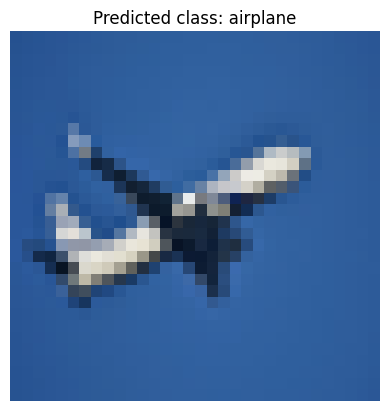

Predicted class: airplane


In [46]:
def predict_image(image_path):
    class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    img = Image.open(image_path)
    img = img.resize((height, width))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, height, width, depth)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class]

    plt.imshow(img)
    plt.title(f'Predicted class: {predicted_class_name}')
    plt.axis('off')
    plt.show()

    return predicted_class_name

predicted_class_name = predict_image("i4.jpg")
print(f'Predicted class: {predicted_class_name}')